#### COMP3602: Data Analysis and Visualization with Python, Spring 2024

# Project Part 1

Source URL of Dataset: [https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks](https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks)

**Group Members:**

- Abdulaziz Saud Al Jabri (134563)

- Mazin Humood Al Dhuhli (134362)


---

### Dataset Introduction:

*A short introduction describing the dataset field or area, it’s purpose and what you aim to learn from analyzing this dataset*

Cybersecurity attack datasets hold the key to understanding cyber threats. They provide valuable information for training security models to detect and prevent attacks, revealing insights into evolving attacker tactics and enabling researchers to benchmark security tools. By analyzing these datasets, researchers can answer crucial questions like the most prevalent attack types, how attack methods shift over time, and how effective machine learning models are in real-time attack identification. Ultimately, this exploration provides researchers ways to develop more robust defenses and stay ahead of the ever-changing threat landscape.

* Purpose:
    - Train security models (e.g., malware detection).
    - Understand attack patterns and trends.
    - Benchmark security tools.

---

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('cybersecurity_attacks.csv')
data.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


---
Show the **maximum** values for each attribute

In [23]:
max_values = data.max()
print(max_values)

Timestamp                                               2023-10-11 19:34:23
Source IP Address                                             99.99.250.252
Destination IP Address                                         99.98.160.72
Source Port                                                           65530
Destination Port                                                      65535
Protocol                                                                UDP
Packet Length                                                          1500
Packet Type                                                            Data
Traffic Type                                                           HTTP
Payload Data              Voluptatum voluptatibus vel tempora harum non ...
Anomaly Scores                                                        100.0
Attack Type                                                         Malware
Attack Signature                                            Known Pattern B
Action Taken

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12584\2227191748.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  max_values = data.max()


---
Show the **minimum** values for each attribute

In [24]:
min_values = data.min()
print(min_values)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12584\2146750465.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  min_values = data.min()


Timestamp                                               2020-01-01 00:43:27
Source IP Address                                                1.1.45.194
Destination IP Address                                          1.1.189.171
Source Port                                                            1027
Destination Port                                                       1024
Protocol                                                               ICMP
Packet Length                                                            64
Packet Type                                                         Control
Traffic Type                                                            DNS
Payload Data              A ab tempora a. Culpa et fuga maxime. Quia ad ...
Anomaly Scores                                                          0.0
Attack Type                                                            DDoS
Attack Signature                                            Known Pattern A
Action Taken

---
Show the 25th, 50th and 75th percentile of the dataset

In [25]:
percentiles = data.quantile([0.25, 0.5, 0.75])
print(percentiles)

      Source Port  Destination Port  Packet Length  Anomaly Scores
0.25     16850.75          17094.75          420.0          25.150
0.50     32856.00          33004.50          782.0          50.345
0.75     48928.25          49287.00         1143.0          75.030


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_12584\4077374767.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentiles = data.quantile([0.25, 0.5, 0.75])


---
Show the number of missing values for each attribute

In [26]:
num_missing_data = data.isnull().sum()
print(num_missing_data)

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


---
Describing simple statistics for numerical attributes

In [27]:
summary_stats = data.describe()
print(summary_stats)

        Source Port  Destination Port  Packet Length  Anomaly Scores
count  40000.000000      40000.000000   40000.000000    40000.000000
mean   32970.356450      33150.868650     781.452725       50.113473
std    18560.425604      18574.668842     416.044192       28.853598
min     1027.000000       1024.000000      64.000000        0.000000
25%    16850.750000      17094.750000     420.000000       25.150000
50%    32856.000000      33004.500000     782.000000       50.345000
75%    48928.250000      49287.000000    1143.000000       75.030000
max    65530.000000      65535.000000    1500.000000      100.000000


---
Bar chart plot to display frequency distribution of some attributes

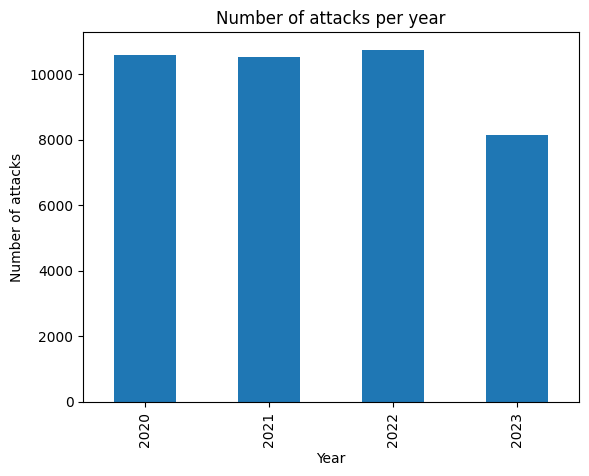

In [28]:
# Visualize the number of attacks per year
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Year'] = data['Timestamp'].dt.year
data['Year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('Number of attacks per year')
plt.show()


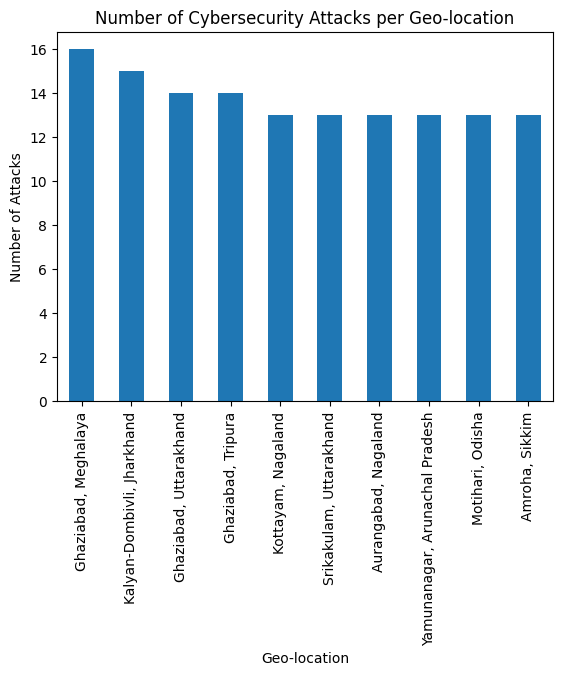

In [29]:
# Visualize the number of attacks per location
data['Geo-location Data'].value_counts().head(10).plot(kind='bar')
plt.title('Number of Cybersecurity Attacks per Geo-location')
plt.xlabel('Geo-location')
plt.ylabel('Number of Attacks')
plt.show()

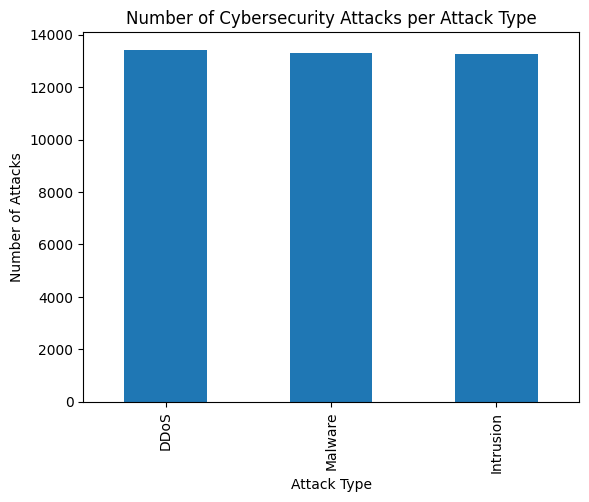

In [30]:

# Visualize the number of attacks per attack type
data['Attack Type'].value_counts().head(10).plot(kind='bar')
plt.title('Number of Cybersecurity Attacks per Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Number of Attacks')
plt.show()